# Case Study

# Objective

Train a simple deep nerual netowrk (DNN) to classify between groups of subjects


# Background

Heart disease is the leading cause of death globally. __Heart failure__ and __Hypertrophic cardiomyopathy__  are the primary cause of heart diseases, and that refers to a physiological state in which the heart is unable to pump sufficiently to maintain blood flow to meet the body's need. It usually occurs because the heart has become too weak or stiff. 

HF is routinely diagnosed by:
* __Electrocardiogram (ECG)__, which measure heart's rhythm and electrical activity. From the ECG the QRS duration can be computed. An increased QRS duration, indicate dyssynchronous contraction and relaxation of the left and right ventricles and it is a marker of detection of HF subjects.
* __MRI__ or __US imaging__ which provides structural and functional information of the heart. Evaluation of the structure and the function of the ventricles can provide useful information for diagnosis and characterization of disease. 
 	 	
Based on the result of these tests, doctors use NYHA class to classify patients' heart failure according to the severity of their symptoms:

__Class I__: no limitation is experienced in any activities; there are no symptoms from ordinary activities.

__Class II__: slight, mild limitation of activity; the patient is comfortable at rest or with mild exertion.

__Class III__: marked limitation of any activity; the patient is comfortable only at rest.

__Class IV__: any physical activity brings on discomfort and symptoms occur at rest.

### Current diagnostic technique

Currently, the parameters used in clinics to identify cardiac patients are:
* __LVEDV__ which is the maximum amount of blood that heart can pump
* __LVESV__ which is the minium amount of blood that heart can pump
* __LVSV__ which is the amount of blood pumped by the left ventricle of the heart in one contraction. 
* __Ejection fraction (EF)__, which computes the amount of blood of the left ventricle (LV) pumps out with each contraction. A normal heart’s ejection fraction may be between 50 and 70 percent.


### Analsysis

In this case study we aim develop a DNN network to classify between the healthy, heart failure and hypertrophic cardiomyopathy subjects.

# Imports

In [0]:
# Add all the import that you will use for this case study
import os

import numpy as np
import pylab as plt
import torch
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit
from torch.nn import functional as F



# Functions

In [0]:
import torch
def compute_metrics(y_true, yPred, target_names):
    """ Compute metrics
    Parameters
    ----------
    yPred: labels predicted using DNN
    y_true: ground truth labels
    target_names:  names matching the labels
    """

    BACC = balanced_accuracy_score(y_true, yPred)
    PRE = precision_score(y_true, yPred, average=None)
    REC = recall_score(y_true, yPred, average=None)
    print('Balanced accuracy  {0:.2f}'.format(BACC))

    headers = ["precision", "recall"]

    rows = zip(target_names, PRE, REC)

    digits = 2
    longest_last_line_heading = 'weighted avg'
    name_width = max(len(cn) for cn in target_names)
    width = max(name_width, len(longest_last_line_heading), digits)
    head_fmt = u'{:>{width}s} ' + u' {:>9}' * len(headers)
    report = head_fmt.format(u'', *headers, width=width)
    report += u'\n\n'
    row_fmt = u'{:>{width}s} ' + u' {:>9.{digits}f}' + u' {:>9}\n'
    for row in rows:
        report += row_fmt.format(*row, width=width, digits=digits)
    report += u'\n'

    print(report)

    return BACC * 100, PRE * 100, REC * 100

def PlotThreeClassData(X,y, title, className):
    """ Plot three class data 
    Parameters
    ----------
    X: data
    y: labels
    title: name of the plot
    className: Name of the classes
    """                 
    plt.scatter(X[y==0,0],X[y==0,1],c='r', label = className[0])
    plt.scatter(X[y==1,0],X[y==1,1],c='b', label = className[1])
    plt.scatter(X[y==2,0],X[y==2,1],c='m', label = className[2])
    plt.legend()
    plt.title(title)

def PlotTwoClassData(X, y, title, _caseTypeNames):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', label=_caseTypeNames[0])
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label=_caseTypeNames[1])
    plt.legend()
    plt.title(title)
    
# Create a DNN network for classification with two layers with sizes 20 and 10. 
class DNN(torch.nn.Module):
    '''Plain dense neural network of linear layers using dropout and ReLU activation.
    Size of the hidden layers: [20,10]
    numClasses: number of classes used for the classification'''
    def __init__(self, numClasses):
        super().__init__()
        dropout_value = 0.05
        ################
        # TO COMPLETE
        ################
    def forward(self, x):
        ################
        # TO COMPLETE
        ################
        return 

# Set paths and hyperparameters

In [3]:
![ -f data.npz ] || wget https://github.com/ericspod/VPHSummerSchool2019/raw/master/data.npz
data_file_name = 'data.npz'
nb_iters = 100000

--2019-06-11 14:12:23--  https://github.com/ericspod/VPHSummerSchool2019/raw/master/data.npz
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ericspod/VPHSummerSchool2019/master/data.npz [following]
--2019-06-11 14:12:23--  https://raw.githubusercontent.com/ericspod/VPHSummerSchool2019/master/data.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39574851 (38M) [application/octet-stream]
Saving to: ‘data.npz’

data.npz            100%[===================>]  37.74M  --.-KB/s    in 0.1s    

2019-06-11 14:12:24 (254 MB/s) - ‘data.npz’ saved [39574851/39574851]



# Compute cardiac metrics

First load the data and based on the segmentations compute:

- LVEDV (maximum volume of the cardiac cycle)
- LVESV (minimum volume of the cardiac cycle)
- LVSV = LVEDV - LVESV 
- LVEF = LVSV/LVEDV*100 

Then:
- Generate a matrix ```metrics``` that concatenate LVEDV, LVESV, LVSV and LVEF

In [47]:
# 1. Load the data
data = np.load(os.path.join(data_file_name))

# 2. Save fields inside data
images = data['images']  # (805, 128, 128)
segs = data['segs']  # (805, 128, 128)
caseNames = data['caseNames']  # 45
caseIndices = data['caseIndices']  # 45
caseTypeNames = data[
    'caseTypeNames']  # ['Normal', 'Heart Failure','Hypertrophy']
caseVoxelSize = data['caseVoxelSize']
caseTypes = data['caseTypes']  # 45
isEDImg = data['isEDImg']  # 805
segTypes = data['segTypes']  # ['Background', 'LV Pool', 'Myocardium']

# 3. Compute LVEDV, LVESV, LVSV and LVEF and stored in a matrix called metrics 
ind_subj1 = caseIndices[0]
print(ind_subj1)
img_subj1 = images[ind_subj1[0]:ind_subj1[1], :, :]
segs_subj1 = segs[ind_subj1[0]:ind_subj1[1], :, :]
print(np.unique(segs_subj1))
isEDImg_subj1 = isEDImg[ind_subj1[0]:ind_subj1[1]]
img_subj1_ED = img_subj1[isEDImg_subj1==True]
img_subj1_ES = img_subj1[isEDImg_subj1==False]
segs_subj1_ED = segs_subj1[isEDImg_subj1==True]
segs_subj1_ES = segs_subj1[isEDImg_subj1==False]
print(segs_subj1_ES.shape)
print(segs_subj1_ED.shape)

# Compute volume
nb_pix_ED_subj1 = np.sum(segs_subj1_ED==1)
EDV_subj1 = nb_pix_ED_subj1*caseVoxelSize[0][0]*caseVoxelSize[0][1]*caseVoxelSize[0][2]/1000

nb_pix_ES_subj1 = np.sum(segs_subj1_ES==1)
ESV_subj1 = nb_pix_ES_subj1*caseVoxelSize[0][0]*caseVoxelSize[0][1]*caseVoxelSize[0][2]/1000

print(EDV_subj1)
print(ESV_subj1)
print((EDV_subj1-ESV_subj1)/EDV_subj1*100)

[ 0 26]
[0 1 2]
(13, 128, 128)
(13, 128, 128)
384.70356173105733
266.2688183232219
30.78597527792894


In [0]:
# 3. Compute LVEDV, LVESV, LVSV and LVEF
metrics = np.zeros((len(caseNames), 4))
for ii, ind in enumerate(caseIndices):
    indED_pat = isEDImg[ind[0]:ind[1]]
    img_pat = images[ind[0]:ind[1], :, :]
    seg_pat = segs[ind[0]:ind[1], :, :]
    img_ED = img_pat[indED_pat, :, :]
    img_ES = img_pat[~indED_pat, :, :]
    seg_ED = seg_pat[indED_pat, :, :]
    seg_ES = seg_pat[~indED_pat, :, :]
    dx, dy, dz = caseVoxelSize[ii]
    volume_per_voxel = dx * dy * dz * 1e-3

    metrics[ii, 0] = np.sum(np.sum(seg_ED == 1, axis=1)) * volume_per_voxel
    metrics[ii, 1] = np.sum(np.sum(seg_ES == 1, axis=1)) * volume_per_voxel
    metrics[ii, 2] = metrics[ii, 0] - metrics[ii, 1]
    metrics[ii, 3] = metrics[ii, 2] / metrics[ii, 0] * 100


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


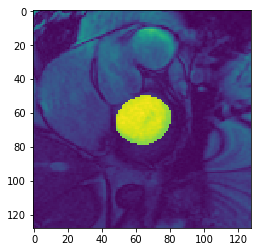

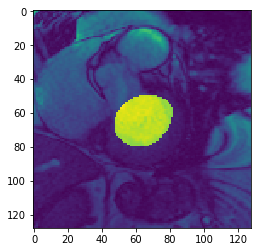

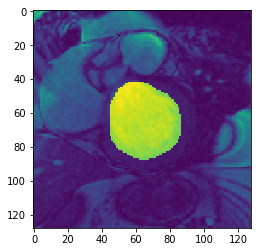

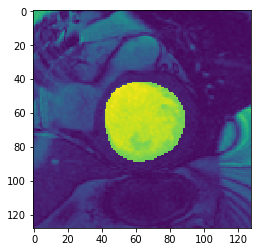

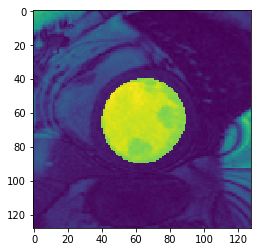

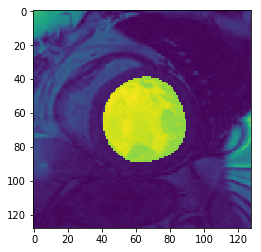

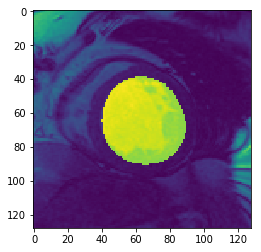

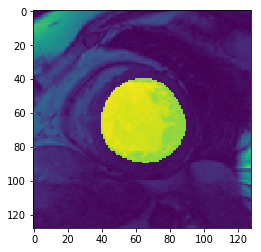

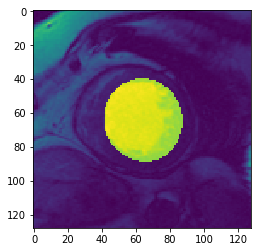

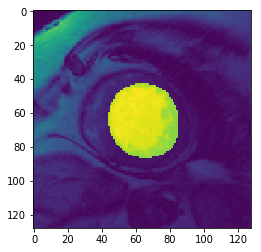

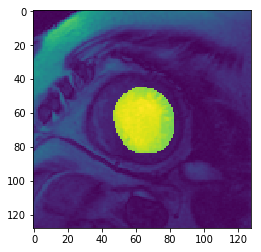

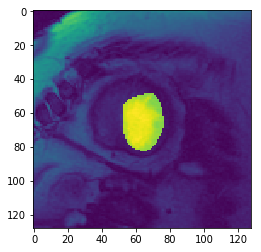

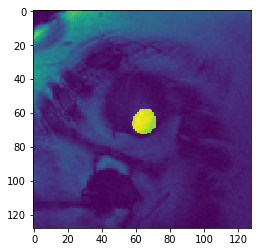

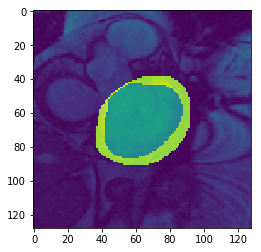

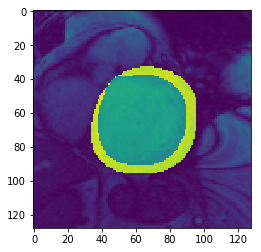

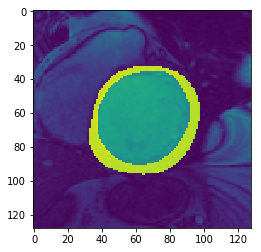

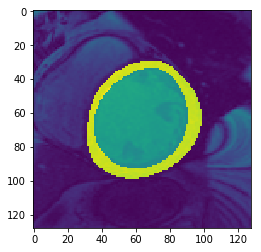

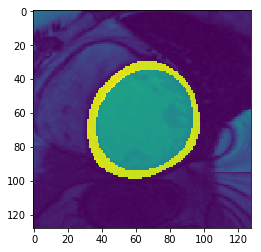

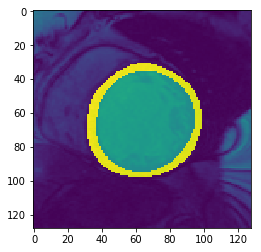

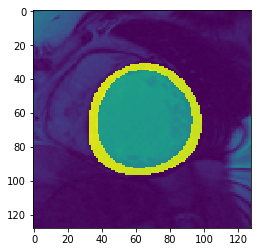

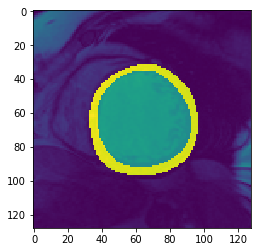

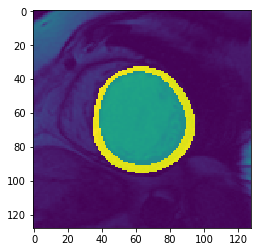

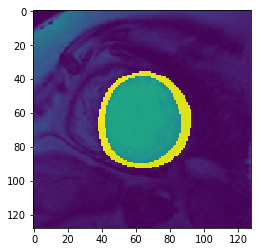

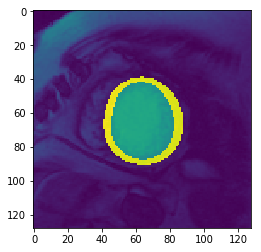

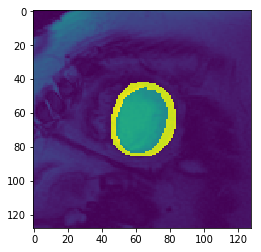

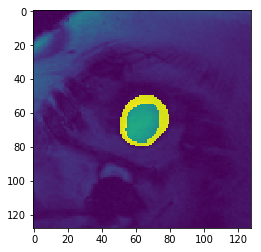

In [16]:
for i in range(len(img_subj1)):
    plt.figure()
    plt.imshow(img_subj1[i]/np.max(img_subj1[i])+segs_subj1[i])

# Visualize the data

Plot LVEDV, LVESV, LVSV and LVEF per groups, i.e. LVEDV and LVESV, LVSV and LVEF

In [0]:
# Use the function PlotThreeClassData to visualize LVEDV vs LVESV and LVSV vs LVEF

################
# TO COMPLETE
################

# Split data into training and test

Data is unbalanced (there is no the same number of patients per group). We need to ensure that in the split training/test there is balanced number of classed. To this end use StratifiedShuffleSplit from scikit-learn that will automatically ensure that.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [0]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(metrics, caseTypes):
    X_train, X_test = metrics[train_index, :], metrics[test_index, :]
    y_train, y_test = caseTypes[train_index], caseTypes[test_index]

# Train a DNN network to perform classification
 

In [0]:
################
# TO COMPLETE
################

#1. Instance the DNN network
output_size = ...
net = DNN(output_size)

xt = torch.from_numpy(...).type(torch.FloatTensor)
yt = torch.from_numpy(...).type(torch.LongTensor)

# Select the loss fuction for classification
# Docs: https://pytorch.org/docs/stable/nn.html
loss_func = ... 

# Select the Optimizer with lr = 0.0001
# Docs: https://pytorch.org/docs/stable/optim.html
opt = ...

losses = []

for i in range(1, nb_iters + 1):

    out = net(xt)  # input x and predict based on x
    loss = loss_func(out, yt)   

    # clear gradients for next train
    ...
    # backpropagation, compute gradients
    ...
    # apply gradients
    ...
    # Stor the loss over iteration 
    ...

    if i % (nb_iters // 10) == 0:
        print(i, losses[-1])

# Plot total loss over iterations
...

# Deploy network and compute metrics

First deploy the trained netowrk and then compute the following metrics: balanced accuracy, precision, recall


In [0]:
################
# TO COMPLETE
################
with torch.no_grad():
    net.eval()
    out = torch.from_numpy(...).float()
    # Deploy DNN for the test dataset and compute the predicted label
    out = ... 
    # Convert to numpy array
    out = ... 
    # Select the highest probability for each input 
    y_pred = np.argmax(out, axis = 1)
    # Compute metrics
    ...

# Case study 2

Redo the same experiment but comparing healthy vs hypertrophic patients and __Healthy__ vs __Hypertrophic cardiomyopathy__ patients 


In [0]:
################# Case 2: healthy vs Hypertrophy ################# 

# 1. Generate new labels -- caseTypes2 -- where 0: Non-Hypertrophic and 1:Hypertrophic
################
# TO COMPLETE
################

# 2. Plot data using PlotTwoClassData function
################
# TO COMPLETE
################

# 3. Split training/test
################
# TO COMPLETE
################

# 4. Train DNN
################
# TO COMPLETE
################

# 5. Deploy DNN and compute metrics
################
# TO COMPLETE
################


# Case study 3

Redo the same experiment but comparing healthy vs hypertrophic patients and __Healthy__ vs __Heart Failure__ patients 


In [0]:
################# Case 2: healthy vs Heart Failure ################# 

# 1. Generate new labels -- caseTypes2 -- where 0: Non Heart Failure and 1:Heart Failure
################
# TO COMPLETE
################

# 2. Plot data using PlotTwoClassData function
################
# TO COMPLETE
################

# 3. Split training/test
################
# TO COMPLETE
################

# 4. Train DNN
################
# TO COMPLETE
################

# 5. Deploy DNN and compute metrics
################
# TO COMPLETE
################

# Optimisation parameters 

Choose the network with higher accuracy and tune the parameters of the DNN network to get the best performances
Parameters to modify: 
- Learning rate
- Number of iterations
- Activation
- Hidden layers
- Dropout


# (OPTIONAL) Cross validation for test set 

If we have a single test set, it might not be representative of the data and performance measures can be unreliable. To deal with this we can generate the test set multiple times as well, using k-fold cross-validation. The class ```StratifiedKFold``` splits the data into K folds making sure that labels are represented proportionally. 

In the code below, input the optimal parameters that you tuned in the previous exercercise. Run the code to see what is the average performance on test sets when using cross-validation strategy.


In [0]:
################
# TO COMPLETE
################

# Generate 5 training/test datasets using the StratifiedShuffleSplit function
sss = StratifiedShuffleSplit(...)
for ... 
    # For each fold get training and test datasets
    ################
    # TO COMPLETE
    ################
    
    # Train DNN using the three labels classes: ['Normal', 'Heart Failure','Hypertrophy']
    ################
    # TO COMPLETE
    ################

    #  Deploy DNN and compute metrics
    ################
    # TO COMPLETE
    ################

# (OPTIONAL) Comparison to more standard machine learning techniques: SVM
More information about the SVM classifier can be found in: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


In [0]:
################
# TO COMPLETE
################
# Imports for svm classifier

# Generate new labels, i.e. ['non heart failture', 'Heart Failure']

# Split training/test

# Train and SVM classifier with a rbf kernel

# Test

# Validation

# Conclusion/ Questions

* which set of clinical parameters performed better in differentiating between groups
* How does the learning rate affect to your model?
* Which is the influence of choosing different activation functions?
* Is there any advantage of using DNN compared to a more standard machine learning techniques?